In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import numpy.ma as ma

In [3]:
# Read in data
b_time = np.load('../DATA_kings_04_imgs/b_time.npy')

In [ ]:
g_time = np.load('../DATA_kings_04_imgs/g_time.npy')

In [ ]:
r_time = np.load('../DATA_kings_04_imgs/r_time.npy')

In [ ]:
re_time = np.load('../DATA_kings_04_imgs/re_time.npy')

In [ ]:
nir_time = np.load('../DATA_kings_04_imgs/nir_time.npy')

In [4]:
# Check size of data
print(b_time.shape)
print(np.max(b_time))
print(np.min(b_time))
print(g_time.shape)
print(np.max(g_time))
print(np.min(g_time))
print(r_time.shape)
print(np.max(r_time))
print(np.min(r_time))
print(re_time.shape)
print(np.max(re_time))
print(np.min(re_time))
print(nir_time.shape)
print(np.max(nir_time))
print(np.min(nir_time))

(1012, 777, 5)
12398
0
(1012, 777, 5)
15088
0
(1012, 777, 5)
18528
0
(1012, 777, 5)
15999
0
(1012, 777, 5)
17437
0


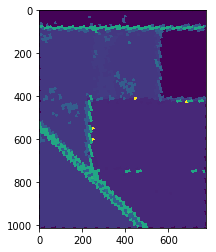

In [5]:
plt.figure(220)
plt.imshow(b_time[:,:,0])
plt.show()

In [6]:
plt.figure(221)
vals = np.histogram(b_time[:,:,0].ravel(), bins=256, range=(0,255))
print(vals[0])

[  7196      0 116984      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0    305   3690      0 271764      0      0      0      0      0
      0      0      0 283085      0      0  25644      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0   8593      0      0      0      0      0
      0  30287      0      0      0      0      0      0      0    311
      0      0      0      0      0   1073      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0    464      0      0      0      0      0      0      0      0
      0   2909  11354  15829   5909      0      0      0      0      0
      0    307      0      0      0      0      0      0      0      0
      

In [7]:
sorted_crops = np.argsort(vals[0])
sorted_crops = sorted_crops[-19:]
sorted_crops = sorted_crops[::-1]
print(sorted_crops)
# Top crop names for kings_01_sub
crop_names = ['Crop 33: Safflower', 'Crop 24: Winter Wheat', 'Crop 2: Cotton', 'Crop 61: Fallow/Idle Cropland', 'Crop 36: Alfalfa', 'Crop 123: Unknown', 'Crop 122: Unknown', 'Crop 54: Tomatoes', 'Crop 0: Unknown', 'Crop 124: Unknown', 'Crop 22: Durum Wheat', 'Crop 121: Unknown', 'Crop 75: Almonds', 'Crop 205: Triticale', 'Crop 111: Unknown', 'Crop 69: Grapes', 'Crop 131: Unknown', 'Crop 21: Barley', 'Crop 85: Unknown']
# Top crop names for fresno_03_sub
#crop_names = ['Crop 69: Grapes', 'Crop 75: Almonds', 'Crop 36: Alfalfa', 'Crop 76: Walnuts', 'Crop 121: Unknown', 'Crop 61: Fallow/Idle Cropland', 'Crop 24: Winter Wheat', 'Crop 225: Winter Wheat and Corn', 'Crop 204: Pistachios', 'Crop 1: Corn', 'Crop 122: Unknown', 'Crop 2: Cotton', 'Crop 0: Unknown', 'Crop 220: Plums', 'Crop 28: Oats', 'Crop 66: Cherries', 'Crop 54: Tomatoes', 'Crop 67: Peaches', 'Crop 4: Sorghum', 'Crop 49: Onions', 'Crop 123: Unknown', 'Crop 208: Garlic', 'Crop 53: Peas', 'Crop 59: Sog/Grass Seed', 'Crop 176: Unknown', 'Crop 205: Triticale', 'Crop 212: Oranges', 'Crop 42: Dry Beans', 'Crop 190: Unknown' ,'Crop 111: Unknown', 'Crop 21: Barley', 'Crop 217: Pomegranates', 'Crop 71: Tree Crops (other)', 'Crop 48: Watermelons', 'Crop 44: Other', 'Crop 22: Durum Wheat', 'Crop 37: Hay and Non-Alfalfa']


[ 33  24   2  61  36 123 122  54   0 124  22 121  75 205 111  69 131  21
  85]


5


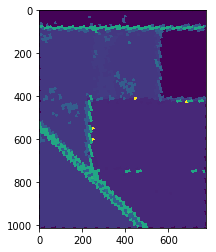

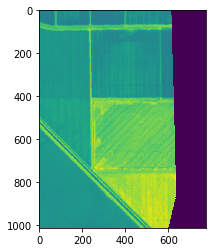

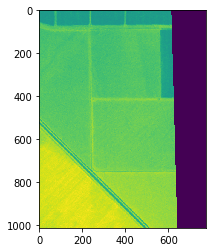

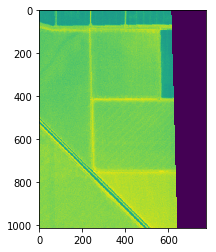

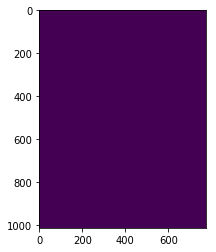

In [8]:
print(b_time[1,1,:].shape[0])

for idx in range(b_time[1,1,:].shape[0]):
    fig_val = 230 + idx
    plt.figure(fig_val)
    plt.imshow(b_time[:,:,idx])
    plt.show()

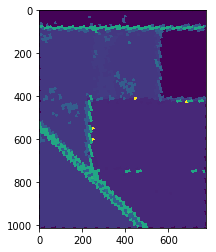

Crop 33: Safflower


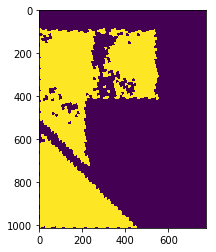

Crop 24: Winter Wheat


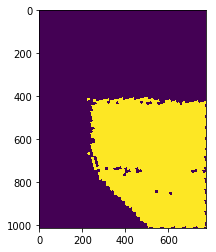

Crop 2: Cotton


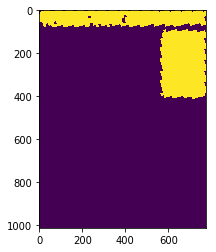

Crop 61: Fallow/Idle Cropland


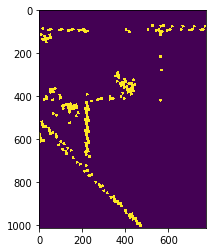

Crop 36: Alfalfa


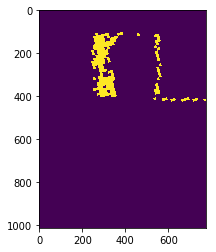

Crop 123: Unknown


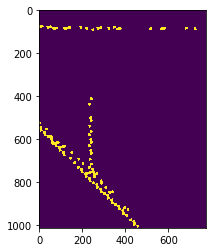

Crop 122: Unknown


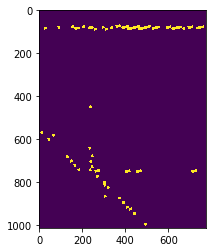

Crop 54: Tomatoes


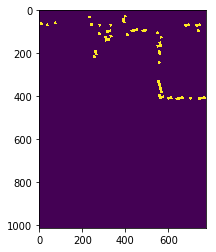

Crop 0: Unknown


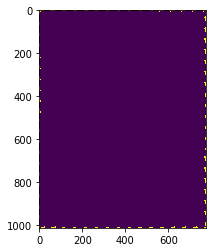

Crop 124: Unknown


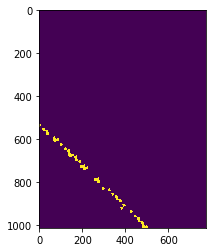

Crop 22: Durum Wheat


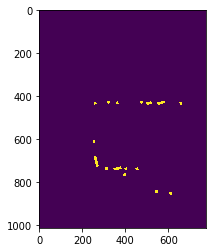

Crop 121: Unknown


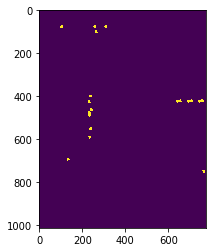

Crop 75: Almonds


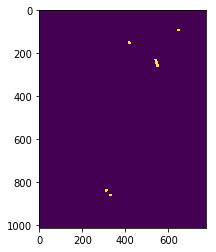

Crop 205: Triticale


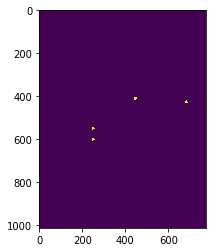

Crop 111: Unknown


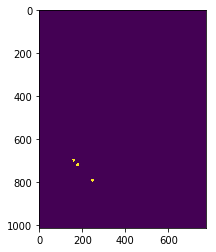

Crop 69: Grapes


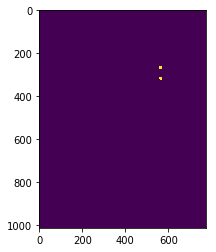

Crop 131: Unknown


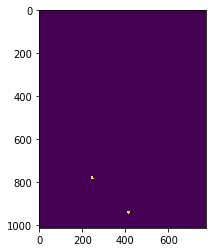

Crop 21: Barley


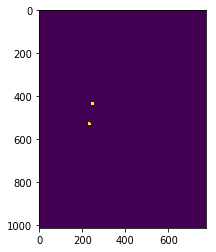

Crop 85: Unknown


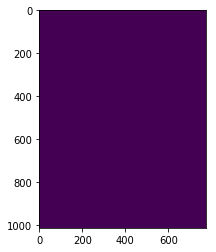

In [9]:
# Show masks of each crop
masks = []
plt.figure(270)
plt.imshow(b_time[:,:,0])
plt.show()

for idx in range(sorted_crops.shape[0]):
    cur_mask = b_time[:,:,0] == sorted_crops[idx]
    masks.append(cur_mask)
    print(crop_names[idx])
    plt.figure(270 + idx)
    plt.imshow(cur_mask)
    plt.show()

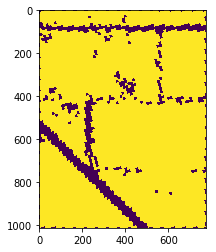

In [10]:
# Show final mask, which includes only Grapes, Almonds, Alfalfa, and Walnuts
#final_mask = masks[0] + masks[1] + masks[2] + masks[3]

# Show final mask, which includes only Safflower, Winter Wheat, Cotton, and Alfalfa
final_mask = masks[0] + masks[1] + masks[2] + masks[4]

plt.figure(300)
plt.imshow(final_mask)
plt.show()

In [11]:
#grapes_r = r_time[masks[0]]
#grapes_r_mean = np.mean(grapes_r, axis=0)
#almonds_r = r_time[masks[1]]
#almonds_r_mean = np.mean(almonds_r, axis=0)
#alfalfa_r = r_time[masks[2]]
#alfalfa_r_mean = np.mean(alfalfa_r, axis=0)
#walnuts_r = r_time[masks[3]]
#walnuts_r_mean = np.mean(walnuts_r, axis=0)

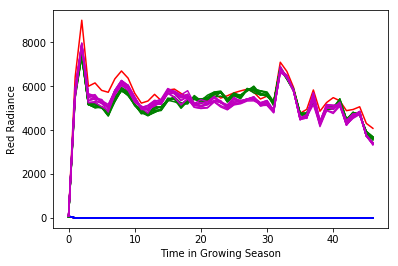

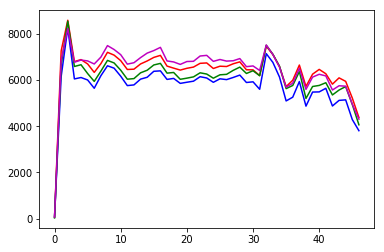

In [12]:
#grapes_r_sub = grapes_r[100:110,:]
#almonds_r_sub = almonds_r[100:110,:]
#alfalfa_r_sub = alfalfa_r[100:110,:]
#walnuts_r_sub = walnuts_r[100:110,:]

#plt.figure(301)
#plt.plot(range(47),grapes_r_sub.T,'r-')
#plt.plot(range(47),almonds_r_sub.T,'b-')
#plt.plot(range(47),alfalfa_r_sub.T,'g-')
#plt.plot(range(47),walnuts_r_sub.T,'m-')
#plt.ylabel('Red Radiance')
#plt.xlabel('Time in Growing Season')
#plt.show()

#plt.figure(302)
#plt.plot(range(47), grapes_r_mean, 'r-')
#plt.plot(range(47), almonds_r_mean, 'b-')
#plt.plot(range(47), alfalfa_r_mean, 'g-')
#plt.plot(range(47), walnuts_r_mean, 'm-')
#plt.show()

In [11]:
grapes_b = b_time[masks[0]] 
grapes_b_mean = np.mean(grapes_b, axis=0)
almonds_b = b_time[masks[1]]
almonds_b_mean = np.mean(almonds_b, axis=0)
alfalfa_b = b_time[masks[2]]
alfalfa_b_mean = np.mean(alfalfa_b, axis=0)
walnuts_b = b_time[masks[3]]
walnuts_b_mean = np.mean(walnuts_b, axis=0)

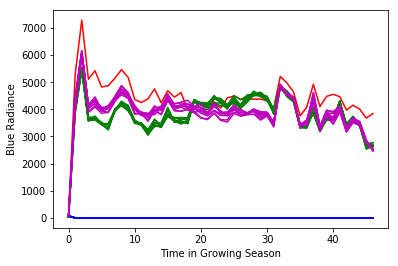

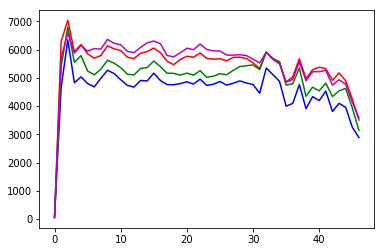

In [12]:
grapes_b_sub = grapes_b[100:110,:]
almonds_b_sub = almonds_b[100:110,:]
alfalfa_b_sub = alfalfa_b[100:110,:]
walnuts_b_sub = walnuts_b[100:110,:]

plt.figure(301)
plt.plot(range(47),grapes_b_sub.T,'r-')
plt.plot(range(47),almonds_b_sub.T,'b-')
plt.plot(range(47),alfalfa_b_sub.T,'g-')
plt.plot(range(47),walnuts_b_sub.T,'m-')
plt.ylabel('Blue Radiance')
plt.xlabel('Time in Growing Season')
plt.show()

plt.figure(302)
plt.plot(range(47), grapes_b_mean, 'r-')
plt.plot(range(47), almonds_b_mean, 'b-')
plt.plot(range(47), alfalfa_b_mean, 'g-')
plt.plot(range(47), walnuts_b_mean, 'm-')
plt.show()

In [13]:
grapes_nir = nir_time[masks[0]]
grapes_nir_mean = np.mean(grapes_nir, axis=0)
almonds_nir = nir_time[masks[1]]
almonds_nir_mean = np.mean(almonds_nir, axis=0)
alfalfa_nir = nir_time[masks[2]]
alfalfa_nir_mean = np.mean(alfalfa_nir, axis=0)
walnuts_nir = nir_time[masks[3]]
walnuts_nir_mean = np.mean(walnuts_nir, axis=0)

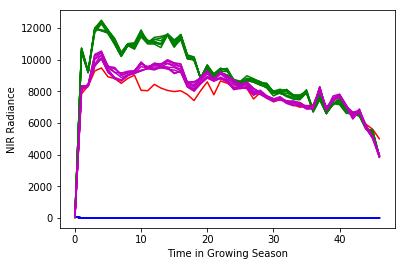

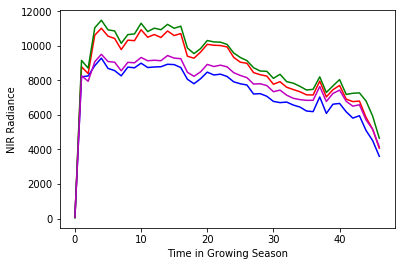

In [15]:
grapes_nir_sub = grapes_nir[100:110,:]
almonds_nir_sub = almonds_nir[100:110,:]
alfalfa_nir_sub = alfalfa_nir[100:110,:]
walnuts_nir_sub = walnuts_nir[100:110,:]

plt.figure(301)
plt.plot(range(47),grapes_nir_sub.T,'r-')
plt.plot(range(47),almonds_nir_sub.T,'b-')
plt.plot(range(47),alfalfa_nir_sub.T,'g-')
plt.plot(range(47),walnuts_nir_sub.T,'m-')
plt.ylabel('NIR Radiance')
plt.xlabel('Time in Growing Season')
plt.show()

plt.figure(302)
plt.plot(range(47), grapes_nir_mean, 'r-')
plt.plot(range(47), almonds_nir_mean, 'b-')
plt.plot(range(47), alfalfa_nir_mean, 'g-')
plt.plot(range(47), walnuts_nir_mean, 'm-')
plt.ylabel('NIR Radiance')
plt.xlabel('Time in Growing Season')
plt.show()

In [14]:
grapes_g = g_time[masks[0]]
grapes_g_mean = np.mean(grapes_g, axis=0)
almonds_g = g_time[masks[1]]
almonds_g_mean = np.mean(almonds_g, axis=0)
alfalfa_g = g_time[masks[2]]
alfalfa_g_mean = np.mean(alfalfa_g, axis=0)
walnuts_g = g_time[masks[3]]
walnuts_g_mean = np.mean(walnuts_g, axis=0)

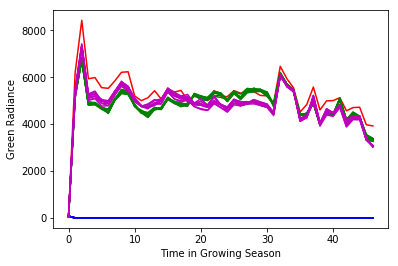

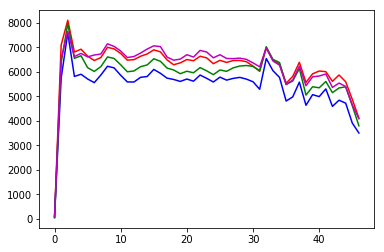

In [16]:
grapes_g_sub = grapes_g[100:110,:]
almonds_g_sub = almonds_g[100:110,:]
alfalfa_g_sub = alfalfa_g[100:110,:]
walnuts_g_sub = walnuts_g[100:110,:]

plt.figure(301)
plt.plot(range(47),grapes_g_sub.T,'r-')
plt.plot(range(47),almonds_g_sub.T,'b-')
plt.plot(range(47),alfalfa_g_sub.T,'g-')
plt.plot(range(47),walnuts_g_sub.T,'m-')
plt.ylabel('Green Radiance')
plt.xlabel('Time in Growing Season')
plt.show()

plt.figure(302)
plt.plot(range(47), grapes_g_mean, 'r-')
plt.plot(range(47), almonds_g_mean, 'b-')
plt.plot(range(47), alfalfa_g_mean, 'g-')
plt.plot(range(47), walnuts_g_mean, 'm-')
plt.show()


In [11]:
crop00_r = r_time[masks[0]]
crop00_r_mean = np.mean(crop00_r, axis=0)
crop01_r = r_time[masks[1]]
crop01_r_mean = np.mean(crop01_r, axis=0)
crop02_r = r_time[masks[2]]
crop02_r_mean = np.mean(crop02_r, axis=0)
crop03_r = r_time[masks[4]]
crop03_r_mean = np.mean(crop03_r, axis=0)

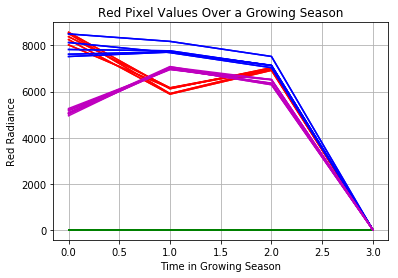

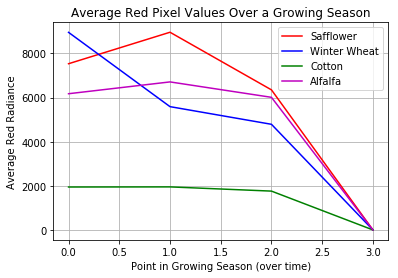

In [13]:
crop00_r_sub = crop00_r[100:110,:]
crop01_r_sub = crop01_r[100:110,:]
crop02_r_sub = crop02_r[100:110,:]
crop03_r_sub = crop03_r[100:110,:]

plt.figure(301)
plt.plot(range(4),crop00_r_sub.T[1:],'r-', label='Safflower')
plt.plot(range(4),crop01_r_sub.T[1:],'b-', label='Winter Wheat')
plt.plot(range(4),crop02_r_sub.T[1:],'g-', label='Cotton')
plt.plot(range(4),crop03_r_sub.T[1:],'m-', label='Alfalfa')
plt.grid(True)
plt.ylabel('Red Radiance')
plt.xlabel('Time in Growing Season')
plt.title('Red Pixel Values Over a Growing Season')
plt.show()

plt.figure(302)
plt.plot(range(4), crop00_r_mean[1:], 'r-', label='Safflower')
plt.plot(range(4), crop01_r_mean[1:], 'b-', label='Winter Wheat')
plt.plot(range(4), crop02_r_mean[1:], 'g-', label='Cotton')
plt.plot(range(4), crop03_r_mean[1:], 'm-', label='Alfalfa')
plt.legend(loc='upper right')
plt.grid(True)
plt.ylabel('Average Red Radiance')
plt.xlabel('Point in Growing Season (over time)')
plt.title('Average Red Pixel Values Over a Growing Season')
plt.show()

In [14]:
crop00_g = g_time[masks[0]]
crop00_g_mean = np.mean(crop00_g, axis=0)
crop01_g = g_time[masks[1]]
crop01_g_mean = np.mean(crop01_g, axis=0)
crop02_g = g_time[masks[2]]
crop02_g_mean = np.mean(crop02_g, axis=0)
crop03_g = g_time[masks[4]]
crop03_g_mean = np.mean(crop03_g, axis=0)

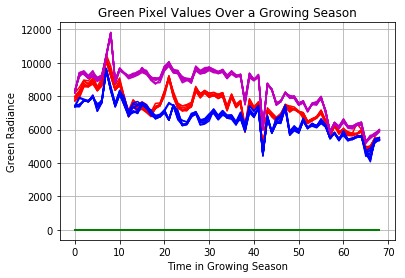

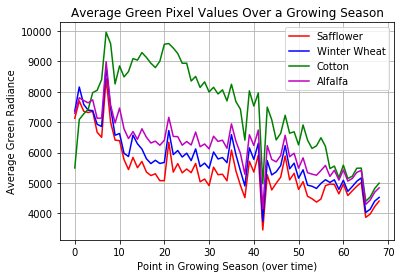

In [12]:
crop00_g_sub = crop00_g[100:110,:]
crop01_g_sub = crop01_g[100:110,:]
crop02_g_sub = crop02_g[100:110,:]
crop03_g_sub = crop03_g[100:110,:]

plt.figure(301)
plt.plot(range(69),crop00_g_sub.T[1:],'r-', label='Safflower')
plt.plot(range(69),crop01_g_sub.T[1:],'b-', label='Winter Wheat')
plt.plot(range(69),crop02_g_sub.T[1:],'g-', label='Cotton')
plt.plot(range(69),crop03_g_sub.T[1:],'m-', label='Alfalfa')
plt.grid(True)
plt.ylabel('Green Radiance')
plt.xlabel('Time in Growing Season')
plt.title('Green Pixel Values Over a Growing Season')
plt.show()

plt.figure(302)
plt.plot(range(69), crop00_g_mean[1:], 'r-', label='Safflower')
plt.plot(range(69), crop01_g_mean[1:], 'b-', label='Winter Wheat')
plt.plot(range(69), crop02_g_mean[1:], 'g-', label='Cotton')
plt.plot(range(69), crop03_g_mean[1:], 'm-', label='Alfalfa')
plt.legend(loc='upper right')
plt.grid(True)
plt.ylabel('Average Green Radiance')
plt.xlabel('Point in Growing Season (over time)')
plt.title('Average Green Pixel Values Over a Growing Season')
plt.show()

In [13]:
crop00_b = b_time[masks[0]]
crop00_b_mean = np.mean(crop00_b, axis=0)
crop01_b = b_time[masks[1]]
crop01_b_mean = np.mean(crop01_b, axis=0)
crop02_b = b_time[masks[2]]
crop02_b_mean = np.mean(crop02_b, axis=0)
crop03_b = b_time[masks[4]]
crop03_b_mean = np.mean(crop03_b, axis=0)

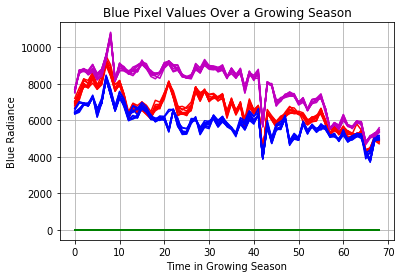

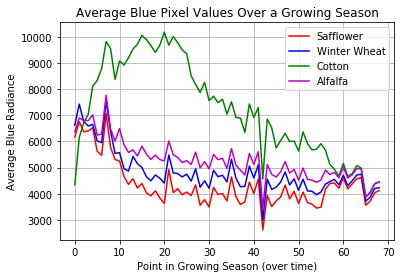

In [10]:
crop00_b_sub = crop00_b[100:110,:]
crop01_b_sub = crop01_b[100:110,:]
crop02_b_sub = crop02_b[100:110,:]
crop03_b_sub = crop03_b[100:110,:]

plt.figure(301)
plt.plot(range(69),crop00_b_sub.T[1:],'r-', label='Safflower')
plt.plot(range(69),crop01_b_sub.T[1:],'b-', label='Winter Wheat')
plt.plot(range(69),crop02_b_sub.T[1:],'g-', label='Cotton')
plt.plot(range(69),crop03_b_sub.T[1:],'m-', label='Alfalfa')
plt.grid(True)
plt.ylabel('Blue Radiance')
plt.xlabel('Time in Growing Season')
plt.title('Blue Pixel Values Over a Growing Season')
plt.show()

plt.figure(302)
plt.plot(range(69), crop00_b_mean[1:], 'r-', label='Safflower')
plt.plot(range(69), crop01_b_mean[1:], 'b-', label='Winter Wheat')
plt.plot(range(69), crop02_b_mean[1:], 'g-', label='Cotton')
plt.plot(range(69), crop03_b_mean[1:], 'm-', label='Alfalfa')
plt.legend(loc='upper right')
plt.grid(True)
plt.ylabel('Average Blue Radiance')
plt.xlabel('Point in Growing Season (over time)')
plt.title('Average Blue Pixel Values Over a Growing Season')
plt.show()

In [14]:
crop00_nir = nir_time[masks[0]]
crop00_nir_mean = np.mean(crop00_nir, axis=0)
crop01_nir = nir_time[masks[1]]
crop01_nir_mean = np.mean(crop01_nir, axis=0)
crop02_nir = nir_time[masks[2]]
crop02_nir_mean = np.mean(crop02_nir, axis=0)
crop03_nir = nir_time[masks[4]]
crop03_nir_mean = np.mean(crop03_nir, axis=0)

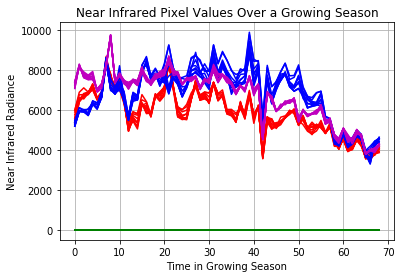

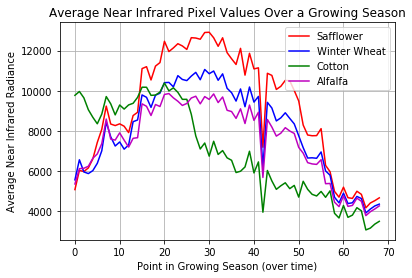

In [11]:
crop00_nir_sub = crop00_nir[100:110,:]
crop01_nir_sub = crop01_nir[100:110,:]
crop02_nir_sub = crop02_nir[100:110,:]
crop03_nir_sub = crop03_nir[100:110,:]

plt.figure(301)
plt.plot(range(69),crop00_nir_sub.T[1:],'r-', label='Safflower')
plt.plot(range(69),crop01_nir_sub.T[1:],'b-', label='Winter Wheat')
plt.plot(range(69),crop02_nir_sub.T[1:],'g-', label='Cotton')
plt.plot(range(69),crop03_nir_sub.T[1:],'m-', label='Alfalfa')
plt.grid(True)
plt.ylabel('Near Infrared Radiance')
plt.xlabel('Time in Growing Season')
plt.title('Near Infrared Pixel Values Over a Growing Season')
plt.show()

plt.figure(302)
plt.plot(range(69), crop00_nir_mean[1:], 'r-', label='Safflower')
plt.plot(range(69), crop01_nir_mean[1:], 'b-', label='Winter Wheat')
plt.plot(range(69), crop02_nir_mean[1:], 'g-', label='Cotton')
plt.plot(range(69), crop03_nir_mean[1:], 'm-', label='Alfalfa')
plt.legend(loc='upper right')
plt.grid(True)
plt.ylabel('Average Near Infrared Radiance')
plt.xlabel('Point in Growing Season (over time)')
plt.title('Average Near Infrared Pixel Values Over a Growing Season')
plt.show()

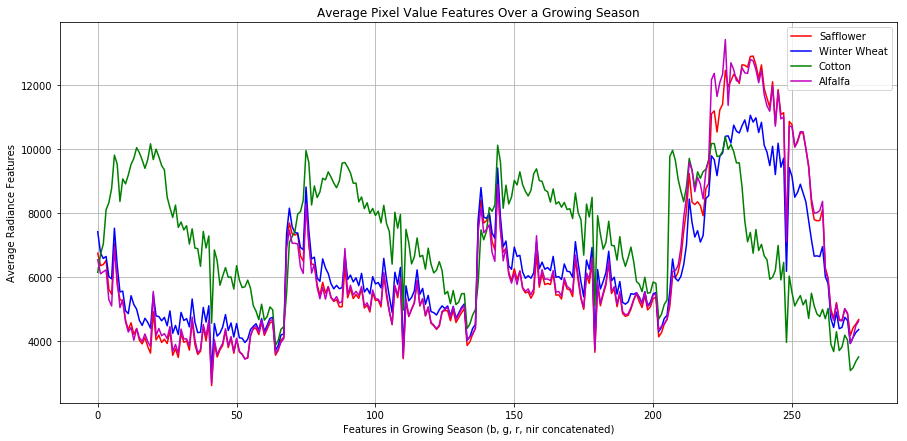

In [23]:
crop00_mean = np.concatenate([crop00_b_mean[1:], crop00_g_mean[1:], crop00_r_mean[1:], crop00_nir_mean[1:]])
crop01_mean = np.concatenate([crop01_b_mean[1:], crop01_g_mean[1:], crop01_r_mean[1:], crop01_nir_mean[1:]])
crop02_mean = np.concatenate([crop02_b_mean[1:], crop02_g_mean[1:], crop02_r_mean[1:], crop02_nir_mean[1:]])
crop03_mean = np.concatenate([crop03_b_mean[1:], crop03_g_mean[1:], crop03_r_mean[1:], crop03_nir_mean[1:]])

plt.figure(figsize=(15,7))
plt.plot(range(69*4-1), crop00_mean[1:], 'r-', label='Safflower')
plt.plot(range(69*4-1), crop01_mean[1:], 'b-', label='Winter Wheat')
plt.plot(range(69*4-1), crop02_mean[1:], 'g-', label='Cotton')
plt.plot(range(69*4-1), crop03_mean[1:], 'm-', label='Alfalfa')
plt.legend(loc='upper right')
plt.grid(True)
plt.ylabel('Average Radiance Features')
plt.xlabel('Features in Growing Season (b, g, r, nir concatenated)')
plt.title('Average Pixel Value Features Over a Growing Season')
plt.show()